In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from BuildingMicrograd import Value, Neuron, Layer, MLP
from Visualize import draw_dot

In [3]:
# Value addition
a = Value(2.0)
b = Value(-3.0)
a + b

Value(data=-1.0)

In [4]:
# Value multiplication
c = Value(4)
d = Value (5)
c*d

Value(data=20)

In [5]:
# Value multiplication and Value addition
# (a.__mul__(c)).__add__(d)
c*a + d

Value(data=13.0)

In [6]:
# _previous addition
g = a + d
g._previous

{Value(data=2.0), Value(data=5)}

In [7]:
# _previous multiplication
h = a * d
h._previous

{Value(data=2.0), Value(data=5)}

In [8]:
# _operation
h = a * d
h._operation

'*'

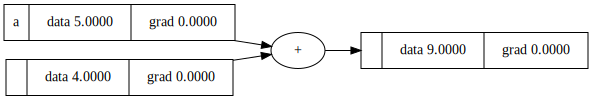

In [9]:
# draw_dot
a = Value(5, label='a')
b = Value(4)

d = a + b


draw_dot(d)

In [10]:
a = Value(2.0, label='a')
b = Value(-3, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

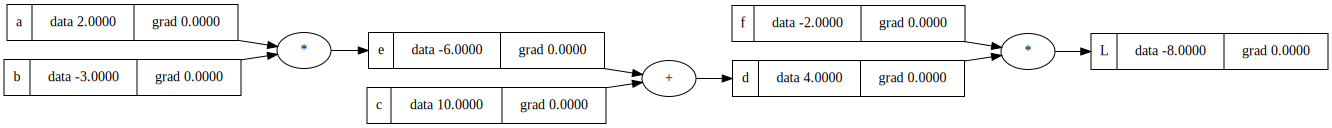

In [11]:
draw_dot(L)

### Neuron Example

We can use tanh as the activation function of our neuron.

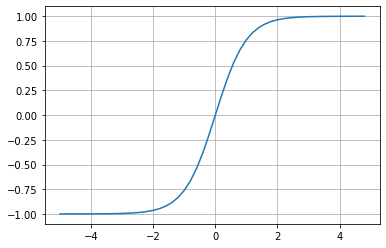

In [12]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [13]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
# mirror the synaptic strength for the input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
output = n.tanh(); output.label = 'output'

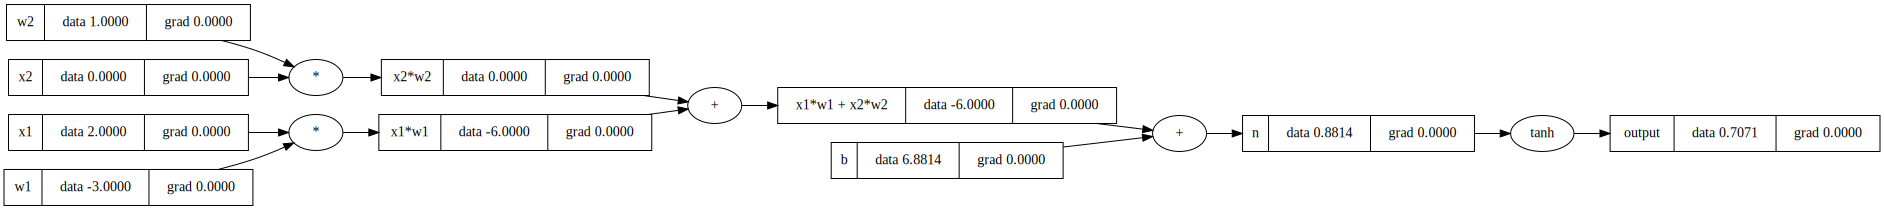

In [14]:
draw_dot(output)

In [15]:
output.backward()

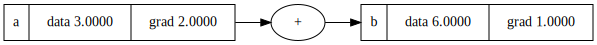

In [16]:
# Fixing bug: When adding the same value to itself, the gradient has to accumulate
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

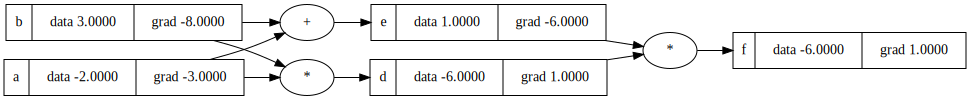

In [17]:
# Fixing bug: When adding the same value to itself, the gradient has to accumulate
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [18]:
# Create a neuron with two inputs
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.9381257342189588)

In [19]:
# Create a layer of two dimentional neurons 
x = [2.0, 3.0]
l = Layer(2,3)
l(x)

[Value(data=-0.9988384718098243),
 Value(data=0.9946652767197535),
 Value(data=0.9313384937055443)]

In [20]:
a = Value(8)
b = 6
d = b * a
d

Value(data=48)

In [21]:
# Create a Multilayer Perceptron
x = [2.0, 3.0, 2.0]
m = MLP(3, [4, 4, 1])
m(x)

Value(data=-0.5875423634058031)

In [38]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [39]:
for k in range(100):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2.0 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 1.4274433172110568
1 1.4163404213739061
2 1.4053510985476771
3 1.3944742624450452
4 1.3837088349466793
5 1.37305374480983
6 1.362507926714062
7 1.352070320569529
8 1.3417398710308805
9 1.3315155271731056
10 1.3213962422943872
11 1.3113809738182929
12 1.301468683273122
13 1.291658336330716
14 1.2819489028905462
15 1.2723393571977573
16 1.2628286779860982
17 1.2534158486385136
18 1.2440998573596231
19 1.23487969735551
20 1.2257543670171756
21 1.2167228701047885
22 1.2077842159304704
23 1.1989374195378593
24 1.1901815018770847
25 1.1815154899741185
26 1.1729384170937176
27 1.1644493228953883
28 1.1560472535819732
29 1.1477312620405815
30 1.139500407975716
31 1.1313537580345163
32 1.123290385924115
33 1.1153093725211616
34 1.1074098059736082
35 1.0995907817948822
36 1.0918514029506152
37 1.0841907799380839
38 1.0766080308585746
39 1.0691022814828652
40 1.0616726653100361
41 1.054318323619831
42 1.0470384055187785
43 1.0398320679803104
44 1.0326984758790825
45 1.025636802019725
46 1.01864

In [40]:
ypred

[Value(data=0.9999989874275474),
 Value(data=-0.8115132364932428),
 Value(data=-0.4044082941833724),
 Value(data=0.4160441858025958)]